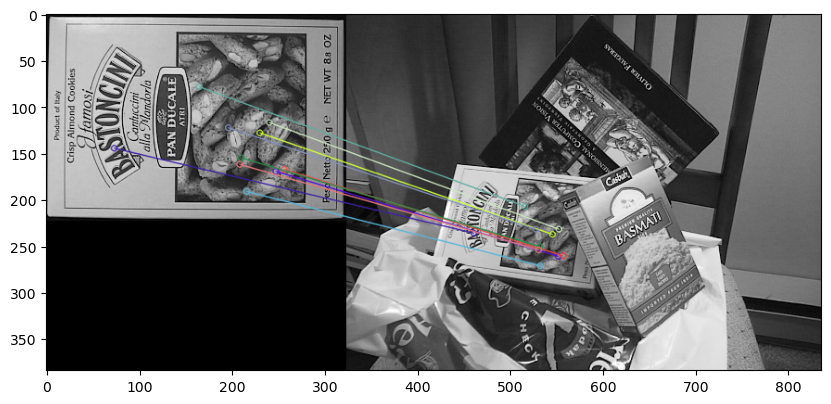

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

qureyImg = cv.imread('box.png', cv.IMREAD_GRAYSCALE)
trainImg = cv.imread('box_in_scene.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()

query_keypoints, query_desc = sift.detectAndCompute(qureyImg, None)
train_keypoints, train_desc = sift.detectAndCompute(trainImg, None)

FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.match(query_desc, train_desc)

matches = sorted(matches, key = lambda x:x.distance)

res = cv.drawMatches(qureyImg, query_keypoints, trainImg, train_keypoints, \
                    matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,10))
plt.imshow(res)
